# Assignment 1

First we need to import a few modules, execute the cell below:

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [2]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return (numpy.cos(x))

You can use the following cell to check that your code works for scalar arguments:

In [3]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [4]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [5]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return (-1*numpy.sin(x))

In [6]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [8]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return ((f(x)-f(x-dx))/dx)



In [9]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


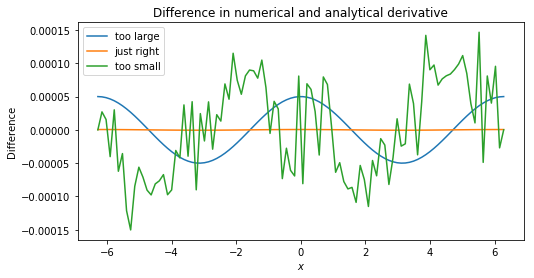

In [10]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)

df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label = "too large") 
plt.plot(xs, df_dx_2 - df_dx_analytical, label = "just right") 
plt.plot(xs, df_dx_3 - df_dx_analytical, label = "too small")

plt.ylabel("Difference")
plt.xlabel("$x$")
plt.title("Difference in numerical and analytical derivative")
plt.legend()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


To obtain an expression for the numerical derivative, we begin by taking the Taylor expansion of the function $f(x_0+\Delta x)$
$$f(x_0+\Delta x) = f(x_0) + f'(x_0)\Delta x+\ldots$$

If $\Delta x$ is taken to be sufficiently small, we can neglect higher order terms such that 
$$f(x_0+\Delta x) \approx f(x_0)+ f'(x_0)\Delta x$$
and we may rearrange to find the derivative $f'(x_0)$
$$f'(x_0) \approx \frac{f(x_0+\Delta x) - f'(x_0)}{x_0} \rightarrow f'(x_0) \approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x} \quad \text{(backward difference)}$$
which is similar to the limit definition of the derivative and the above expression indeed approaches the true value of the derivative in the limit $\Delta x\rightarrow 0$. 

When too large a value of $\Delta x$ is chosen, it is a poor approximation to neglect higher order terms in the manner done above and thus the above expression for the derivative is not very accurate as a result (we were only able to solve for $f'(x_0)$ by taking higher order terms to be essentially $0$). 


For the case where $\Delta x$ is too small, we lose accuracy as a result of machine precision. Due to the fact, we only have a enough memory to store floating numbers to a finite precision, when we perform operations, there will be a numerical error between the calculated value and the true value. It should be noted however that this emerges not because of the order of magnitude of $\Delta x$ itself but rather its order of magnitude relative to other numbers involved in the calculation. For instance, if we had the code:

x = 2e-36 + 3e-36
print (x)

executing this code gives an output of '5e-36' or $5\times 10^{-36}$. 

However, for

y = 1 + 1e-36
print(y)

the output is '1.0' which is clearly not true but is the case due to the large difference between the order of magnitudes ($10^0$ as opposed to $10^{-36}$). With regards, to the actual cosine function $-1\leq \cos x \leq 1 \, \forall x\in \mathbb{R}$. This causes the chaotic behaviour seen in the graph where there is an especially large difference where the order of magnitude of $\cos x$ is (too) many orders of magnitude higher relative to that of $\Delta x$ (such as at $x=0$) such that we get a numerical error in $f(x-\Delta x)$ and thus an overall error in the numerical derivative. 